In [1]:
cifar10_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}
cifar100_labels_fine = {
    0: 'apple', 1: 'aquarium_fish', 2: 'baby', 3: 'bear', 4: 'beaver',
    5: 'bed', 6: 'bee', 7: 'beetle', 8: 'bicycle', 9: 'bottle',
    10: 'bowl', 11: 'boy', 12: 'bridge', 13: 'bus', 14: 'butterfly',
    15: 'camel', 16: 'can', 17: 'castle', 18: 'caterpillar', 19: 'cattle',
    20: 'chair', 21: 'chimpanzee', 22: 'clock', 23: 'cloud', 24: 'cockroach',
    25: 'couch', 26: 'crab', 27: 'crocodile', 28: 'cup', 29: 'dinosaur',
    30: 'dolphin', 31: 'elephant', 32: 'flatfish', 33: 'forest', 34: 'fox',
    35: 'girl', 36: 'hamster', 37: 'house', 38: 'kangaroo', 39: 'keyboard',
    40: 'lamp', 41: 'lawn_mower', 42: 'leopard', 43: 'lion', 44: 'lizard',
    45: 'lobster', 46: 'man', 47: 'maple_tree', 48: 'motorcycle', 49: 'mountain',
    50: 'mouse', 51: 'mushroom', 52: 'oak_tree', 53: 'orange', 54: 'orchid',
    55: 'otter', 56: 'palm_tree', 57: 'pear', 58: 'pickup_truck', 59: 'pine_tree',
    60: 'plain', 61: 'plate', 62: 'poppy', 63: 'porcupine', 64: 'possum',
    65: 'rabbit', 66: 'raccoon', 67: 'ray', 68: 'road', 69: 'rocket',
    70: 'rose', 71: 'sea', 72: 'seal', 73: 'shark', 74: 'shrew',
    75: 'skunk', 76: 'skyscraper', 77: 'snail', 78: 'snake', 79: 'spider',
    80: 'squirrel', 81: 'streetcar', 82: 'sunflower', 83: 'sweet_pepper', 84: 'table',
    85: 'tank', 86: 'telephone', 87: 'television', 88: 'tiger', 89: 'tractor',
    90: 'train', 91: 'trout', 92: 'tulip', 93: 'turtle', 94: 'wardrobe',
    95: 'whale', 96: 'willow_tree', 97: 'wolf', 98: 'woman', 99: 'worm'
}

In [2]:
from tensorflow.keras.datasets import cifar10, cifar100

In [3]:
(X_train10, Y_train10), (X_test10, Y_test10) = cifar10.load_data()
(X_train100, Y_train100), (X_test100, Y_test100) = cifar100.load_data()

169001437/169001437 [==============================] - 13s 0us/step


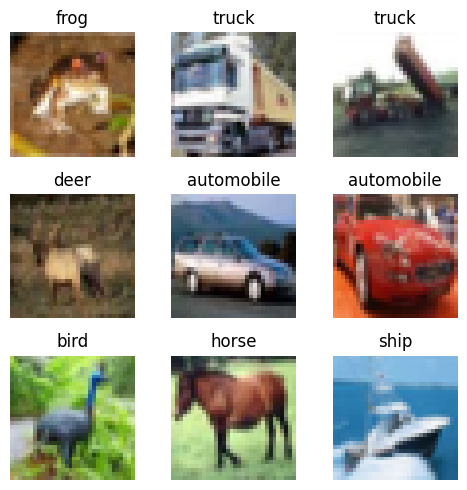

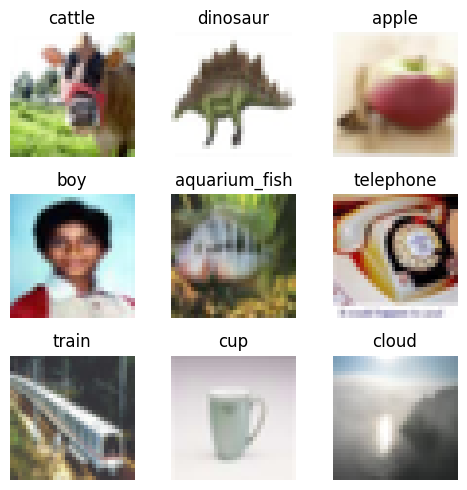

In [4]:
import matplotlib.pyplot as plt

# CIFAR-10
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train10[i])
    plt.title(f'{cifar10_labels[Y_train10[i][0]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# CIFAR-100
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train100[i])
    plt.title(f'{cifar100_labels_fine[Y_train100[i][0]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

alexnet = Sequential()

# Camada 01
alexnet.add(Conv2D(96,(11,11), input_shape=(32,32,3), padding = 'same' ))
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2)))

# Camada 02
alexnet.add(Conv2D(256,(5,5), padding = 'same' ))
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2)))

# Camada 03
alexnet.add(Conv2D(384,(3,3), padding = 'same' ))
alexnet.add(Activation('relu'))

# Camada 04
alexnet.add(Conv2D(384,(3,3), padding = 'same' ))
alexnet.add(Activation('relu'))

# Camada 05
alexnet.add(Conv2D(256,(3,3), padding = 'same' ))
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2)))

# Camada 06
alexnet.add(Flatten())
alexnet.add(Dense(4096))

# Camada 07
alexnet.add(Dense(4096))

# Camada 08
alexnet.add(Dense(100))
alexnet.add(Activation('softmax'))

alexnet.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 96)        34944     
                                                                 
 activation_6 (Activation)   (None, 32, 32, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 256)       614656    
                                                                 
 activation_7 (Activation)   (None, 16, 16, 256)       0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                 

In [10]:
# Treina o modelo
alexnet.fit(X_train100 / 255.0, to_categorical(Y_train100), batch_size=100, shuffle=True, epochs=20,
            validation_data=(X_test100 / 255.0, to_categorical(Y_test100)))

Epoch 1/20
500/500 [==============================] - 32s 50ms/step - loss: 3.7968 - accuracy: 0.1229 - val_loss: 3.2909 - val_accuracy: 0.2148
Epoch 2/20
500/500 [==============================] - 24s 49ms/step - loss: 3.0156 - accuracy: 0.2593 - val_loss: 2.8807 - val_accuracy: 0.2888
Epoch 3/20
500/500 [==============================] - 25s 50ms/step - loss: 2.6385 - accuracy: 0.3356 - val_loss: 2.6352 - val_accuracy: 0.3408
Epoch 4/20
500/500 [==============================] - 24s 49ms/step - loss: 2.3233 - accuracy: 0.3995 - val_loss: 2.4912 - val_accuracy: 0.3772
Epoch 5/20
500/500 [==============================] - 24s 49ms/step - loss: 2.0300 - accuracy: 0.4639 - val_loss: 2.4420 - val_accuracy: 0.3918
Epoch 6/20
500/500 [==============================] - 25s 51ms/step - loss: 1.7354 - accuracy: 0.5290 - val_loss: 2.4483 - val_accuracy: 0.3972
Epoch 7/20
500/500 [==============================] - 25s 51ms/step - loss: 1.4272 - accuracy: 0.6070 - val_loss: 2.5503 - val_accuracy:

In [16]:
alexnet.save('aula06.keras')

In [11]:
alexnet.pop()

# Nova Camada
alexnet.add(Dense(10))
alexnet.add(Activation('softmax'))

alexnet.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 96)        34944     
                                                                 
 activation_6 (Activation)   (None, 32, 32, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 256)       614656    
                                                                 
 activation_7 (Activation)   (None, 16, 16, 256)       0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                 

In [14]:
# Treina o modelo
alexnet.fit(X_train10 / 255.0, to_categorical(Y_train10), batch_size=128, shuffle=True, epochs=10,
            validation_data=(X_test10 / 255.0, to_categorical(Y_test10)))

Epoch 1/10
386/391 [============================>.] - ETA: 0s

ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.